In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import re

In [4]:
file = '/home/rolvy-dicken/sentiment_analysis_on_coronavirus_tweets_dataset.csv'
# df = pd.read_csv(file)

In [5]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [6]:
df = pd.read_csv(file, encoding = 'ISO-8859-1')

In [7]:
df;

# 1. Analysing the dataset 

In [8]:
df.sample(n=5, random_state=123)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
21746,25545,70497,"Bugolobi, Kampala-Uganda",25-03-2020,Four traders have been arrested in Koboko town...,Negative
27641,31440,76392,Chicago,03-04-2020,Definitely expecting the companies already lag...,Positive
16374,20173,65125,"Deerfield, IL",22-03-2020,The beginning of our week of confinement https...,Neutral
35458,39257,84209,Central Alberta,09-04-2020,Expert...? \r\r\n\r\r\nWeÂre] in a situation ...,Extremely Negative
38444,42243,87195,"California, USA",11-04-2020,ÂFew have any way to appreciate this newly fr...,Extremely Positive


In [9]:
# Check some values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [10]:
# Our dataset has 41157 rows and 6 columns
df.shape

(41157, 6)

In [11]:
# Columns in our dataset 
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [12]:
# Count location
df['Location'].value_counts()

London                540
United States         528
London, England       520
New York, NY          395
Washington, DC        373
                     ... 
New York, USA           1
Wrentham, MA            1
US OF A                 1
Elmira, ON, Canada      1
Midland, Texas          1
Name: Location, Length: 12220, dtype: int64

In [15]:
# Let's Check missing values in 'Location' column
miss_value = df['Location'].isnull().sum()/(df.shape[0]) * 100
print("we have {:.2f} % of missing values in 'Location' Column".format(miss_value))

we have 20.87 % of missing values in 'Location' Column


## Documents in the datset

In [16]:
print("There are '%s' documents in the dataset." %(df.shape[0]))

There are '41157' documents in the dataset.


## Documents per class

In [17]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

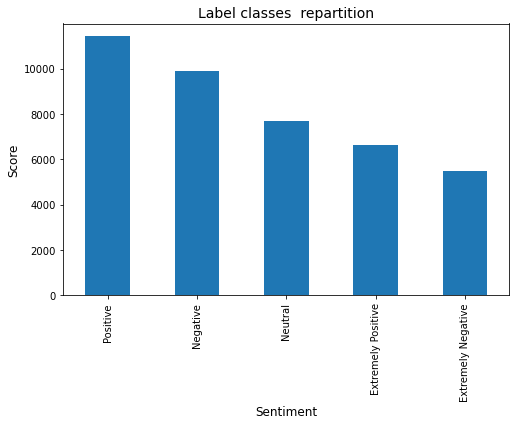

In [18]:
ax = df['Sentiment'].value_counts().plot(kind='bar', figsize=(8, 5))
fig = ax.get_figure()
ax.set_title('Label classes  repartition', size=14)
ax.set_xlabel('Sentiment', size=12)
ax.set_ylabel('Score', size=12)
plt.show()

# 2.  Textual data Preprocessing

In [19]:
covid = df.copy()
# covid['OriginalTweet'][234]

#### Remove @person caracter

In [11]:
def extract_mention(tweet):
    hashes = re.findall(r"@[\w]*", tweet)
    for i in hashes:
        tweet = re.sub(i, '', tweet)
    return tweet

In [12]:
covid['Clean_tweet'] = covid['OriginalTweet'].apply(extract_mention)
covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,https://t.co/iFz9FAn2Pa and https://t.co/xX...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [ ]:
# Remove 

In [13]:
covid['Clean_tweet'] = covid['Clean_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [ ]:
# remove punctions, words wich are not formed letters

In [14]:
covid['Clean_tweet'] = covid['Clean_tweet'].str.replace('[^a-zA-Z#]+',' ')

In [15]:
covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the #COVI...


In [16]:
# create new variable tokenized tweet 


In [17]:
def tokens_tweet(dataset):
    # we first remove short words
    dataset = ' '.join([x for x in dataset.split() if len(x) > 2])
    dataset_tokens = [t for t in dataset.split()]
    return dataset_tokens

In [18]:
covid['tokenized_tweet'] = covid['Clean_tweet'].apply(tokens_tweet) 
tokenized_tweet = covid['tokenized_tweet'] # Let's define the tokenized tweets 

### Stemming 

In [19]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [20]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [21]:
tokenized_tweet = covid['Clean_tweet']
covid.head()
# covid['OriginalTweet'][234]
# covid['Clean_tweet'][234]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet,tokenized_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,[]
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,"[advice, Talk, your, neighbours, family, excha..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...,"[Coronavirus, Australia, Woolworths, give, eld..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,"[food, stock, not, the, only, one, which, empt..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the #COVI...,"[ready, supermarket, during, the, #COVID, outb..."


### Let's Convert our text data to lowercase

In [22]:
covid['Clean_tweet'] = covid['Clean_tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet,tokenized_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,[]
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,"[advice, Talk, your, neighbours, family, excha..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,"[Coronavirus, Australia, Woolworths, give, eld..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,"[food, stock, not, the, only, one, which, empt..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the #covi...,"[ready, supermarket, during, the, #COVID, outb..."


### Let's now remove stop words

In [23]:
import nltk
nltk.download('stopwords') 

from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/rolvy-
[nltk_data]     dicken/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
covid['Clean_tweet'] =covid['Clean_tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))
covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet,tokenized_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,[]
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,"[advice, Talk, your, neighbours, family, excha..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,"[Coronavirus, Australia, Woolworths, give, eld..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...,"[food, stock, not, the, only, one, which, empt..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket #covid outbreak paranoid ...,"[ready, supermarket, during, the, #COVID, outb..."


### features_needed

In [25]:
my_data = covid[['Clean_tweet', 'Sentiment']]
my_data.head(10)

,Clean_tweet,Sentiment
0,,Neutral
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia woolworths give elderly ...,Positive
3,food stock one empty please panic enough food ...,Positive
4,ready go supermarket #covid outbreak paranoid ...,Extremely Negative
5,news region first confirmed covid case came su...,Positive
6,cashier grocery store sharing insights #covid ...,Positive
7,supermarket today buy toilet paper #rebel #toi...,Neutral
8,due covid retail store classroom atlanta open ...,Positive
9,corona prevention stop buy things cash use onl...,Negative


In [26]:
my_data = covid[['Clean_tweet', 'Sentiment']]
my_data.tail(10)

,Clean_tweet,Sentiment
41147,really shitting much home #covid #coronavirus ...,Negative
41148,uv light sterilizer sanitizer mask mobile phon...,Extremely Positive
41149,still shocked number #toronto supermarket empl...,Negative
41150,never situation amp world going supermarket pi...,Positive
41151,definitely man feel like fall need honor heroe...,Extremely Positive
41152,airline pilots offering stock supermarket shel...,Neutral
41153,response complaint provided citing covid relat...,Extremely Negative
41154,know getting tough rationing toilet paper #cor...,Positive
41155,wrong smell hand sanitizer starting turn #coro...,Neutral
41156,well new used rift going amazon rn although no...,Negative


### Possiblity to apply Corect Spelling

In [2]:
# my_data["Clean_tweet"][41156]

In [ ]:
# a = 'well new used rift going amazon rn although normal market price usually prices really crazy right vr headsets since hl alex announced worse covid whethe'

In [27]:
# from textblob import TextBlob

# b = str(TextBlob(a).correct())


# # covid['clean_twee'].apply(lambda x: str(TextBlob(x).correct()))

In [28]:
# Check if there is any null value
my_data['Clean_tweet'].isnull().sum()

0

# 3. Split the data in train/test sets

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(my_data['Clean_tweet'], my_data['Sentiment'], 
                                                    test_size=0.2)
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (32925,)
Shape of y_train:  (32925,)
Shape of X_test:  (8232,)
Shape of y_test:  (8232,)


## Features extraction

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4. Apply machine learning algorithms

##1.Naive Bayes
##2.SVM
##3.Logistic Regression
##4.Decision Tree

## Naive Bayes

In [31]:
from sklearn.metrics import *
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train_tfidf,y_train)

NB_prediction = naiveByes_clf.predict(X_test_tfidf)
NB_accuracy = accuracy_score(y_test, NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train_tfidf,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.7673196659073652
Validation accuracy Score :  0.3826530612244898
                    precision    recall  f1-score   support

Extremely Negative       0.04      0.93      0.07        45
Extremely Positive       0.04      0.86      0.08        64
          Negative       0.38      0.45      0.41      1697
           Neutral       0.11      0.83      0.19       202
          Positive       0.91      0.34      0.50      6224

          accuracy                           0.38      8232
         macro avg       0.30      0.68      0.25      8232
      weighted avg       0.77      0.38      0.47      8232



## Support Vector Machines

In [32]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train_tfidf, y_train)

svc_prediction = svc.predict(X_test_tfidf)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train_tfidf,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction, y_test))

Training accuracy Score    :  0.9909794988610479
Validation accuracy Score :  0.5215014577259475
                    precision    recall  f1-score   support

Extremely Negative       0.40      0.63      0.49       679
Extremely Positive       0.46      0.70      0.56       837
          Negative       0.48      0.48      0.48      2004
           Neutral       0.48      0.62      0.54      1203
          Positive       0.68      0.45      0.54      3509

          accuracy                           0.52      8232
         macro avg       0.50      0.58      0.52      8232
      weighted avg       0.55      0.52      0.52      8232



## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train_tfidf, y_train)

logreg_prediction = logreg.predict(X_test_tfidf)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train_tfidf,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

/home/rolvy-dicken/anaconda3/envs/deeplearning/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy Score    :  0.9441761579347001
Validation accuracy Score :  0.5410592808551993
                    precision    recall  f1-score   support

Extremely Negative       0.51      0.60      0.55       909
Extremely Positive       0.55      0.62      0.58      1136
          Negative       0.48      0.50      0.49      1933
           Neutral       0.56      0.61      0.59      1434
          Positive       0.59      0.48      0.53      2820

          accuracy                           0.54      8232
         macro avg       0.54      0.56      0.55      8232
      weighted avg       0.54      0.54      0.54      8232



## Decision tree classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train_tfidf, y_train)

dtc_prediction = dtc.predict(X_test_tfidf)
dtc_accuracy = accuracy_score(y_test,dtc_prediction)
print("Training accuracy Score    : ",dtc.score(X_train_tfidf,y_train))
print("Validation accuracy Score : ",dtc_accuracy)
print(classification_report(dtc_prediction, y_test))

Training accuracy Score    :  0.9962034927866363
Validation accuracy Score :  0.41861030126336246
                    precision    recall  f1-score   support

Extremely Negative       0.32      0.48      0.38       715
Extremely Positive       0.33      0.51      0.40       819
          Negative       0.34      0.39      0.37      1727
           Neutral       0.72      0.39      0.50      2938
          Positive       0.38      0.43      0.40      2033

          accuracy                           0.42      8232
         macro avg       0.42      0.44      0.41      8232
      weighted avg       0.48      0.42      0.43      8232



# 5. Best model 

In [35]:
model_compare = pd.DataFrame({"Naive Bayes":NB_accuracy,                              
                              "Support Vector Machine":svc_accuracy,
                              "Logistic Regression":logreg_accuracy,
                               "Decision Tree":dtc_accuracy,

                            },index=["accuracy"])

In [36]:
model_compare

,Naive Bayes,Support Vector Machine,Logistic Regression,Decision Tree
accuracy,0.382653,0.521501,0.541059,0.41861


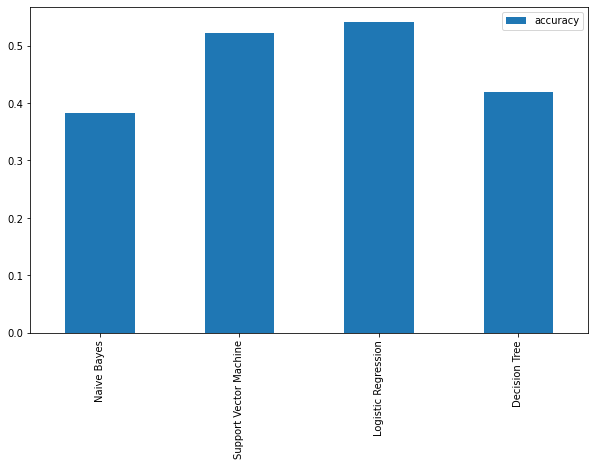

In [37]:
model_compare.T.plot.bar(figsize=(10,6));

### Conlusion:
    As we can see the best model is the Logistic Regression Classifier since it has the highest accuracy; with 54% accuracy.
    
    

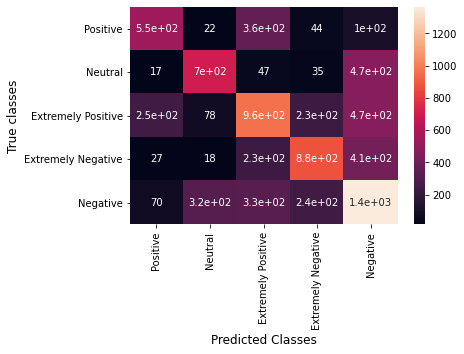

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, logreg_prediction), annot=True, xticklabels=set(y_train),
            yticklabels=set(y_train), )
plt.ylabel('True classes', size=12)
plt.xlabel('Predicted Classes', size=12)
plt.show()

# Grid search CV Logistic Regression

In [86]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [ ]:
logreg_grid = {'C': np.logspace(-4,4,30),
               "solver":["liblinear"]}

#setup  the gird cv
gs_log_reg = GridSearchCV(logreg,
                          param_grid=logreg_grid,
                          cv=5,
                          verbose=True)

#fit grid search cv
gs_log_reg.fit(X_train_tfidf, y_train)